In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Generate synthetic data
def generate_data(n_samples=300, n_centers=4, random_seed=42):
    np.random.seed(random_seed)
    points_per_center = n_samples // n_centers
    centers = np.random.uniform(-10, 10, (n_centers, 2))
    X = np.vstack([center + np.random.randn(points_per_center, 2) for center in centers])
    return X

In [11]:
# Calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [12]:
# Compute the distance matrix
def compute_distance_matrix(X):
    n_samples = X.shape[0]
    distances = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            distances[i, j] = euclidean_distance(X[i], X[j])
            distances[j, i] = distances[i, j]
    return distances

In [13]:
# Hierarchical Clustering (single-linkage)
def hierarchical_clustering(X):
    distances = compute_distance_matrix(X)
    n_samples = len(X)
    clusters = [[i] for i in range(n_samples)]

    while len(clusters) > 4:  # Stop when we have 4 clusters (change as needed)
        min_dist = float('inf')
        to_merge = (None, None)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                d = np.min([distances[p][q] for p in clusters[i] for q in clusters[j]])
                if d < min_dist:
                    min_dist = d
                    to_merge = (i, j)

        i, j = to_merge
        clusters[i].extend(clusters[j])
        del clusters[j]

    return clusters

In [23]:
def extract_clusters(clusters, n_samples):
    labels = np.zeros(n_samples)
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_id
    return labels

In [24]:
# Generate data and perform hierarchical clustering
X = generate_data()
final_clusters = hierarchical_clustering(X)

In [25]:
# Extract final cluster labels
cluster_labels = extract_clusters(final_clusters, len(X))

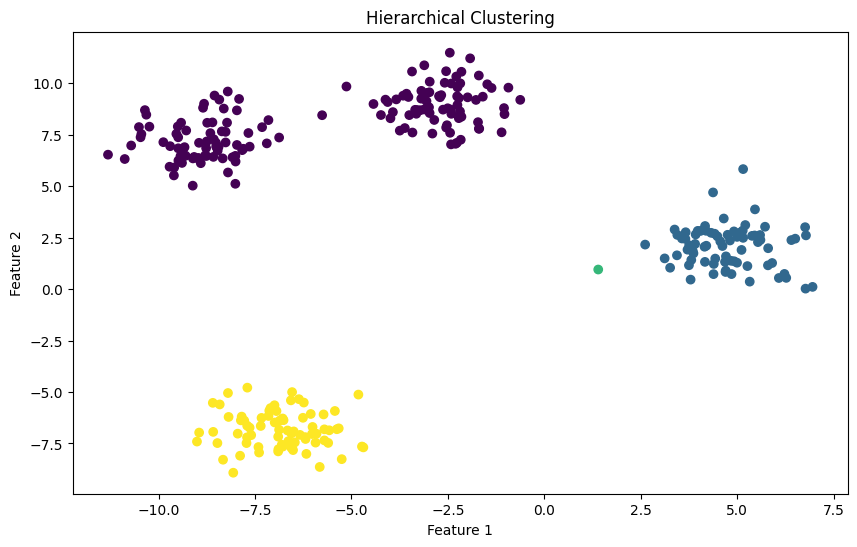

In [26]:
#Plot Hierarchical Clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()